# 1. Importation des Librairies

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')


# Charger les donnees

In [156]:
data = pd.read_csv('data/DDoS_dataset.csv')
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


# Étape 3 : Analyse de données

In [157]:
# Étape 3 : Analyse de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [158]:
data['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [159]:
data['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [160]:
data['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [161]:
data.drop(columns='src', inplace=True, axis=1)
data.drop(columns='dst', inplace=True, axis=1)
data.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


# Étape 4 : Prétraitement des données

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
encoder = LabelEncoder()

In [164]:
data['Protocol'] = encoder.fit_transform(data['Protocol'])
data.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,3,3413,3665,0,0.0,0.0,0


In [165]:
data['Protocol'].unique()

array([2, 1, 0])

In [166]:
data.isnull().sum()

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [167]:
import seaborn as sns

<Axes: >

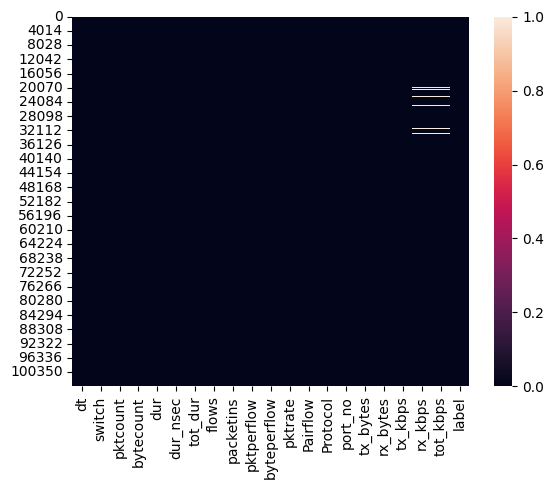

In [168]:
sns.heatmap(data.isnull())

In [169]:
import warnings
warnings.filterwarnings('ignore')

### VALEURS MANQUANTES

In [170]:
data['rx_kbps'].fillna(data['rx_kbps'].mean(), inplace=True)
data['tot_kbps'].fillna(data['tot_kbps'].mean(), inplace=True)
data.isnull().sum()

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [171]:
data

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,0,1,15209,12720,1,1.0,2.0,0


# Étape 5 : Diviser les données : Train et Test 

In [172]:
data.columns

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [173]:
X = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

In [174]:
X

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,2,3,143928631,3917,0,0.0,0.0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,2,4,3842,3520,0,0.0,0.0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,1,3795,1242,0,0.0,0.0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,2,3688,1492,0,0.0,0.0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,1,15209,12720,1,1.0,2.0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,3,15099,14693,1,1.0,2.0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,2,3409,3731,0,0.0,0.0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,1,15209,12720,1,1.0,2.0


In [175]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

### standardisation

In [176]:
scaler=StandardScaler()

In [177]:
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [178]:
X_train

array([[ 1.94281346,  0.91229006, -0.69439331, ...,  1.35818406,
        -0.27711054,  0.86579005],
       [-1.0548262 , -0.11131402, -1.01449907, ..., -0.41157932,
        -0.48927321, -0.63906319],
       [ 1.13889683,  0.91229006, -0.7194082 , ..., -0.15281066,
         3.45471405,  2.13876038],
       ...,
       [-0.27572903, -0.11131402,  0.63950914, ...,  1.21891048,
        -0.34328972,  0.71501845],
       [-1.26065226,  0.91229006,  0.88460878, ..., -0.41199138,
         0.74088099,  0.16473392],
       [-0.47461901, -0.11131402,  1.50797668, ..., -0.41199138,
        -0.48975982, -0.63969936]])

In [179]:
# Splitting 
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=40)

In [181]:
print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-train:", y_test.shape)

X-train: (80345, 20)
X-test: (24000, 20)
y-train: (80345,)
y-train: (24000,)


# Étape 6 : Construire le Shallow Neural Network

In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [183]:
model = Sequential()

In [184]:

model.add(Dense(10, input_shape=(20,), activation='relu'))


model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

# Entrainement du modele
history = model.fit(X_train, y_train, epochs=75, verbose=1, validation_data=(X_test, y_test))

# Étape 7 : Visualiser l’évolution de l’entrainement du RN

In [185]:
history

In [186]:
import matplotlib.pyplot as plt

In [187]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

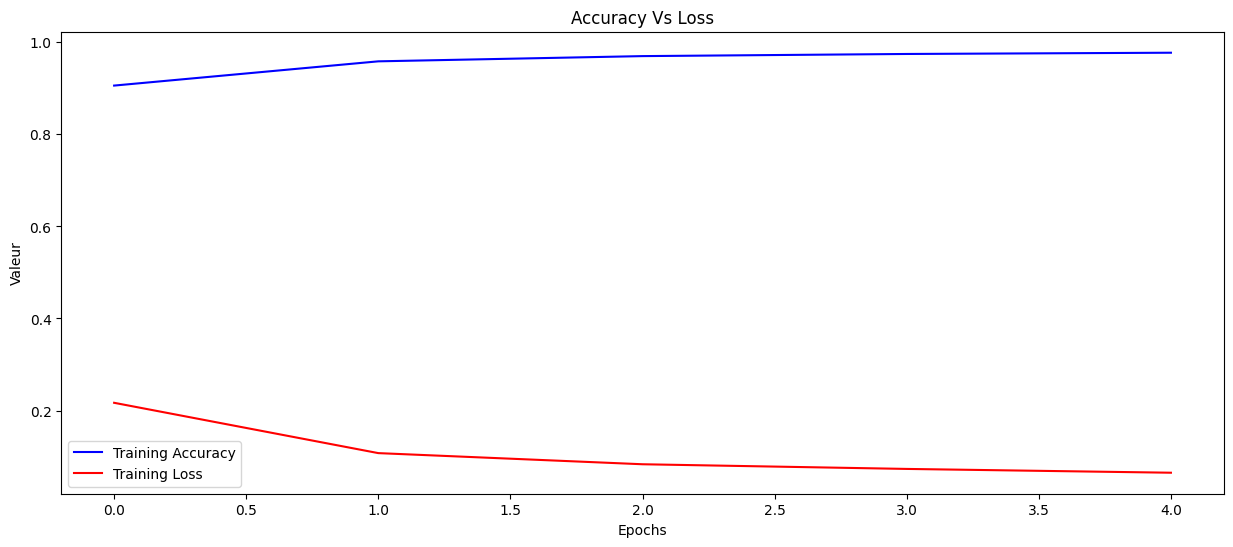

In [188]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

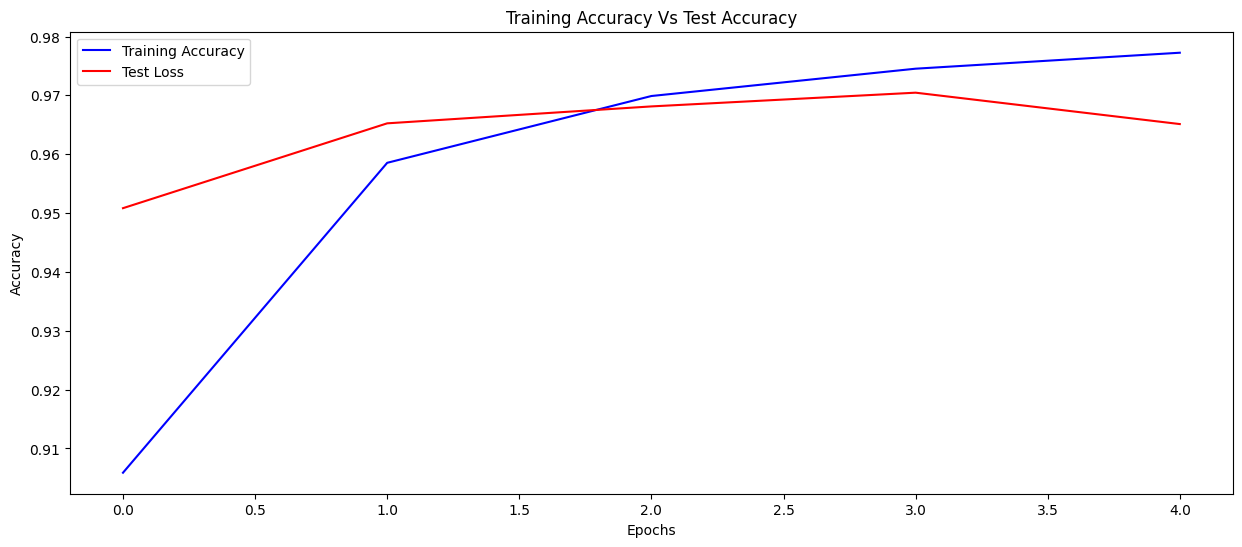

In [189]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

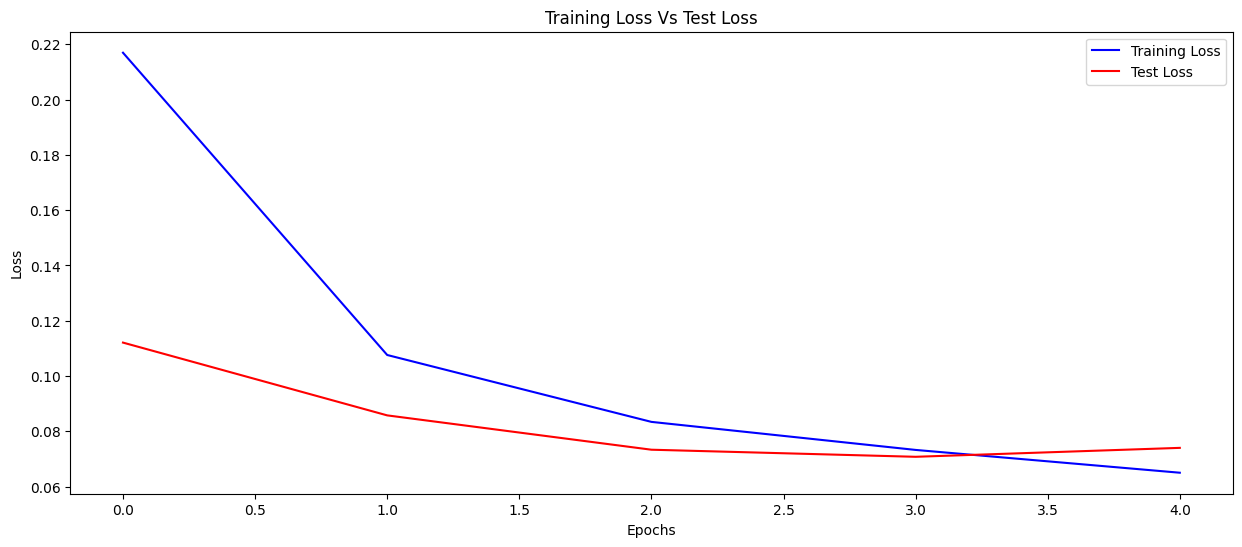

In [190]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.plot()
plt.show()

# Étape 8 : Evaluer le modèle

In [191]:
model.evaluate(X_test, y_test)

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3926 - loss: 34482540544.0000


[34420187136.0, 0.39145833253860474]

In [192]:
model.evaluate(X_test, y_test)

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3926 - loss: 34482540544.0000


[34420187136.0, 0.39145833253860474]

### DEEP LEARNING MODEL

In [193]:
from tensorflow.keras.layers import Dropout

In [194]:
model_dnn = Sequential()
model_dnn.add(Dense(15, input_shape=(20,), activation='relu'))
model_dnn.add(Dense(30, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(60, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(120, activation='relu'))
model_dnn.add(Dense(240, activation='relu'))
model_dnn.add(Dense(1, activation='sigmoid'))


In [195]:
opt= 'adam'
epo = 5

In [196]:
model_dnn.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

model_dnn.summary()                  

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 120)            │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 240)            │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │           241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,256 (153.34 KB)

 Trainable params: 39,256 (153.34 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.8, random_state=40)

In [198]:
history = model_dnn.fit(X_train, y_train, epochs=epo, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8242 - loss: 0.3569 - val_accuracy: 0.9366 - val_loss: 0.1304
Epoch 2/5
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9490 - loss: 0.1185 - val_accuracy: 0.9565 - val_loss: 0.0994
Epoch 3/5
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9570 - loss: 0.1007 - val_accuracy: 0.9634 - val_loss: 0.0857
Epoch 4/5
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9635 - loss: 0.0878 - val_accuracy: 0.9599 - val_loss: 0.0876
Epoch 5/5
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9682 - loss: 0.0785 - val_accuracy: 0.9688 - val_loss: 0.0726
